### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Image enhancement algorithms using Morphological Operations**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

#### Mathematical Morphology
Tool for extracting image components that are useful in the representation and description of region shape [1].

There are morphological techniques for pre- or postprocessing images, such as morphological filtering, thinning, and prunning.

It is important to make mention that our inputs would be images and outputs images, whose outputs are **image attributes**, for tasks such as **object extraction** and **description**.

As we mention before, the Morphology is a tool that can help us in tasks suchs as:
* Image segmentation.
* Feature extraction.
* Object recognition.

that fom the foundation of techniques for extracting "meaning" from an image.


#### Binary Images
Two compoenntes of of each elements of the set refers to the coordinates of a pixel, and the third corresponds to is discret intensity value. Sets in higher dimensional spaces can contain other image attributes, such as color and time-varying components.

Morphological operations are defined in terms of sets.

Morphology is used with two types of sets of pixels:
* Objects: defined as sets of foreground pixels.
* Structuring elements (SE's): specified in terms of both foreground and background prixels, in SE we can have elements called "don't care" which it means that the elements doesn't matter, the value can be ignored, or it can be made to fit a desired value (Structuring elements are used in a form similar to spatial convolution kernels).

<img src="https://www.researchgate.net/profile/Thotreingam-Kasar/publication/228680780/figure/fig3/AS:669275350126607@1536579086384/The-foreground-and-the-background-pixels-of-each-edge-component.jpg" alt="Image Alt Text" width="250"/>


The concept of set reflection and translation are used extensively in morphology in connection with SE's.



In this lab we are going to focus in tools used for binary image morphology, including:
* Erosion.
* Dilation.
* Opening.
* Closinng.


with the used of these algorithms in binary image morphology, it can perfom task such as:
* Morphological smoothing.
* Edge detection.
* Extracting connected components.
* Skeletonizing.

It also can be applied algorithms for grayscale image processing for tasks such as:
* Textural segmentation.
* Granulometry.
* Computing gray-scale image gradients.






### Importing libraries

In [45]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [46]:
# Loading images
thrombosis_image = cv2.imread("data/thrombosis.jpg")
thrombosis_image = cv2.cvtColor(thrombosis_image,cv2.COLOR_BGR2GRAY)
pet_image = cv2.imread("data/pet_image.png")
pet_image = cv2.cvtColor(pet_image, cv2.COLOR_BGR2GRAY)
fingerprint = cv2.imread("data/fingerprint.png")
fingerprint_image = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)

In [47]:
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray"):
    """
    Plots a list of images in a grid layout using Matplotlib.

    Parameters:
    images (list): List of images to be plotted.
    labels (list): List of labels for each image. Default is an empty list.
    nrows (int): Number of rows in the grid. Default is 1.
    ncols (int): Number of columns in the grid. Default is 2.
    figsize (tuple): Size of the figure in inches. Default is (12, 8).
    cmap (str): Colormap to be used for displaying the images. Default is "gray".

    Returns:
    None
    """

    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if len(labels) > 0:
                ax.set_title(labels[i])
            # dont show the axis ticks
            ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots
    plt.tight_layout()
    plt.show()


### 1. Application of Erosion in Image Processing
Morphological erosion removes floating pixels and thin lines so that only substantive objects remain. Remaining lines appear thinner and shapes appear smaller [2].

<img src="https://www.mathworks.com/help/images/morph_erode.png" width="250"/>

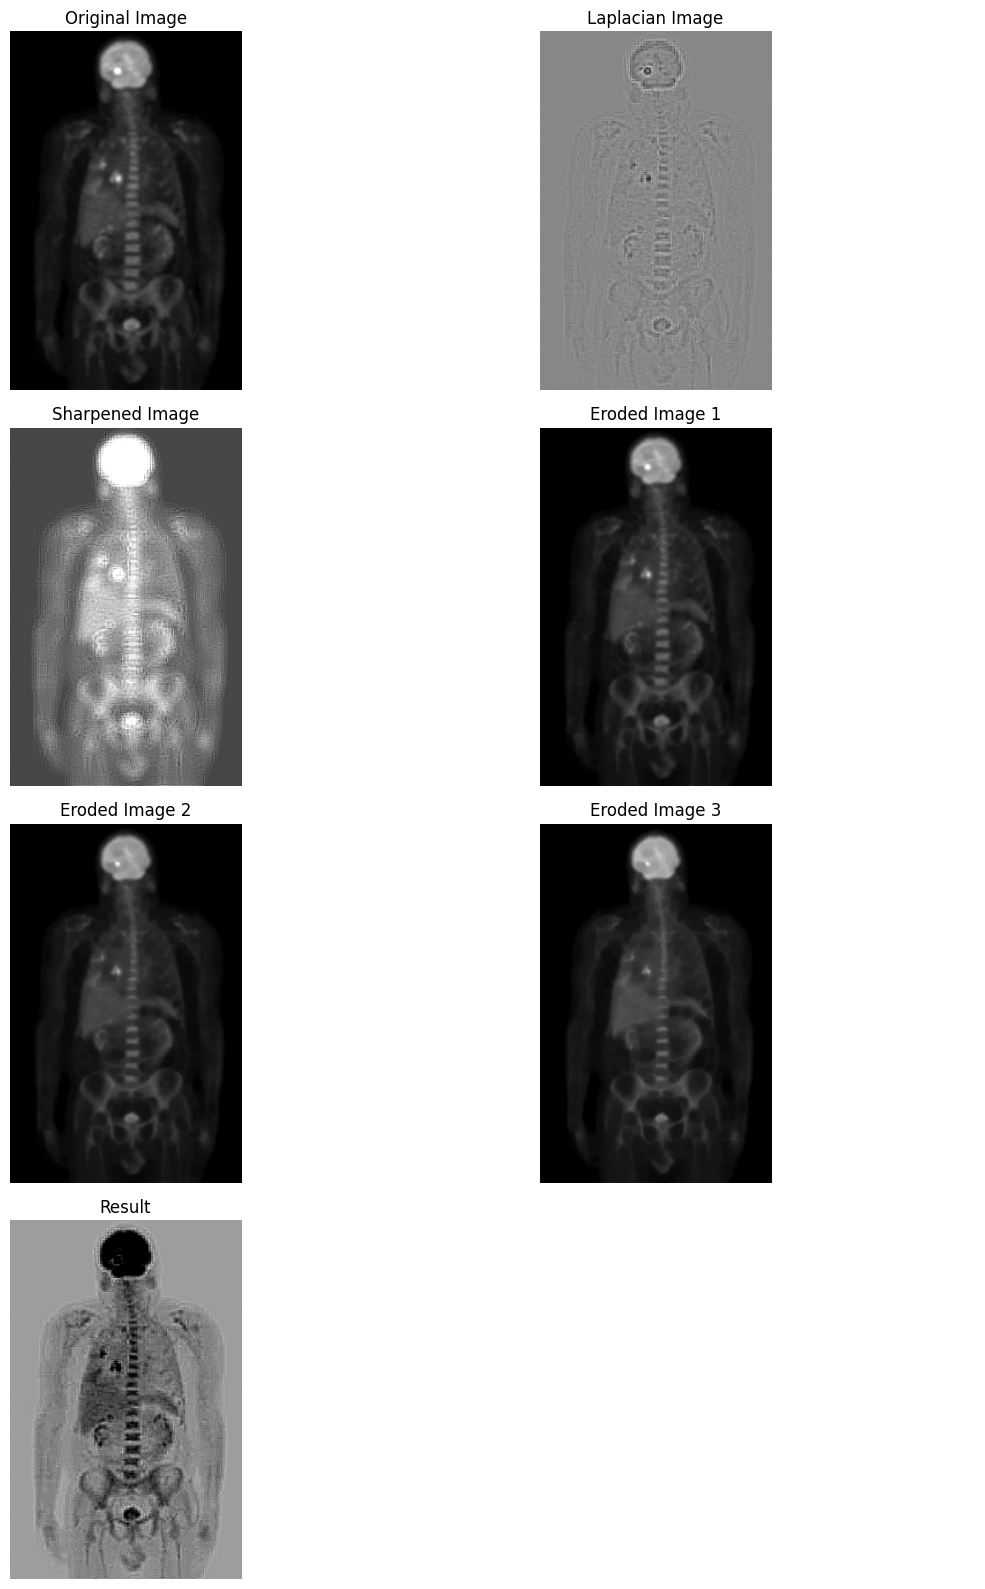

In [48]:
# Apply Gaussian Blur to the pet image
gaussian_image = cv2.GaussianBlur(pet_image, (3, 3), 0.1)

# Apply Laplacian filter to the blurred image to detect edges
laplacian_image = cv2.Laplacian(gaussian_image, cv2.CV_64F, ksize=3)

# Normalize the Laplacian image to the range [0, 255]
laplacian_image = cv2.normalize(laplacian_image, None, 0, 255, cv2.NORM_MINMAX)
laplacian_image = np.uint8(laplacian_image)

# Define a sharpening kernel
sharpening_kernel = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])

# Sharpen the image by adding the Laplacian image to the original image
shapened_image = cv2.add(pet_image, laplacian_image)
sharpened_image = cv2.filter2D(shapened_image, -1, sharpening_kernel)

# Apply Otsu's thresholding to the pet image
ret, thr_image = cv2.threshold(pet_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Initialize a list to store eroded images
eroded_images = []

# Define a kernel for erosion
kernel = np.ones((3, 3), np.uint8)

# Apply erosion with increasing iterations and store the results
for i in range(3):
    eroded = cv2.erode(pet_image.copy(), kernel=kernel, iterations=i+1)
    eroded_images.append(eroded)

# Subtract the second eroded image from the Laplacian image
result = cv2.subtract(laplacian_image, eroded_images[1])

# Plot the original, Laplacian, sharpened, eroded images, and the result
plot_images([pet_image, laplacian_image, shapened_image] + eroded_images + [result], 
            labels=['Original Image', 'Laplacian Image', 'Sharpened Image', 'Eroded Image 1', 'Eroded Image 2', 'Eroded Image 3', 'Result'], 
            nrows=4, ncols=2, figsize=(12, 16))


### 2. Application of Dilation in Image Processing

According to Anon (n.d), one of the most basic morphological operations is dilation.
 
Dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries. The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image. 

In the morphological dilation operation, the value of the output pixel is the maximum value of all pixels in the input pixel's neighborhood. In a binary image, a pixel is set to 1 if any of the neighboring pixels have the value 1.

Morphological dilation makes objects more visible and fills in small holes in objects. Lines appear thicker, and filled shapes appear larger.

<img src="https://www.mathworks.com/help/images/morph_dilate.png" width="250"/>

#### Morphological Dilation on Binary Images

In binary images, dilation adds pixels to the boundaries of objects in an image. The number of pixels added to the objects in an image depends on the size and shape of the structuring element used to process the image.

<img src="https://www.mathworks.com/help/images/morph21.gif" width="250"/>

#### Morphological Dilation on Grayscale Images

In grayscale images, dilation replaces the center pixel value with the maximum pixel value in the neighborhood defined by the structuring element. The size of the neighborhood is defined by the structuring element. The structuring element is a matrix with a defined center that is used to determine the neighborhood of the center pixel.

<img src="https://www.mathworks.com/help/images/morph6.gif" width="250"/>


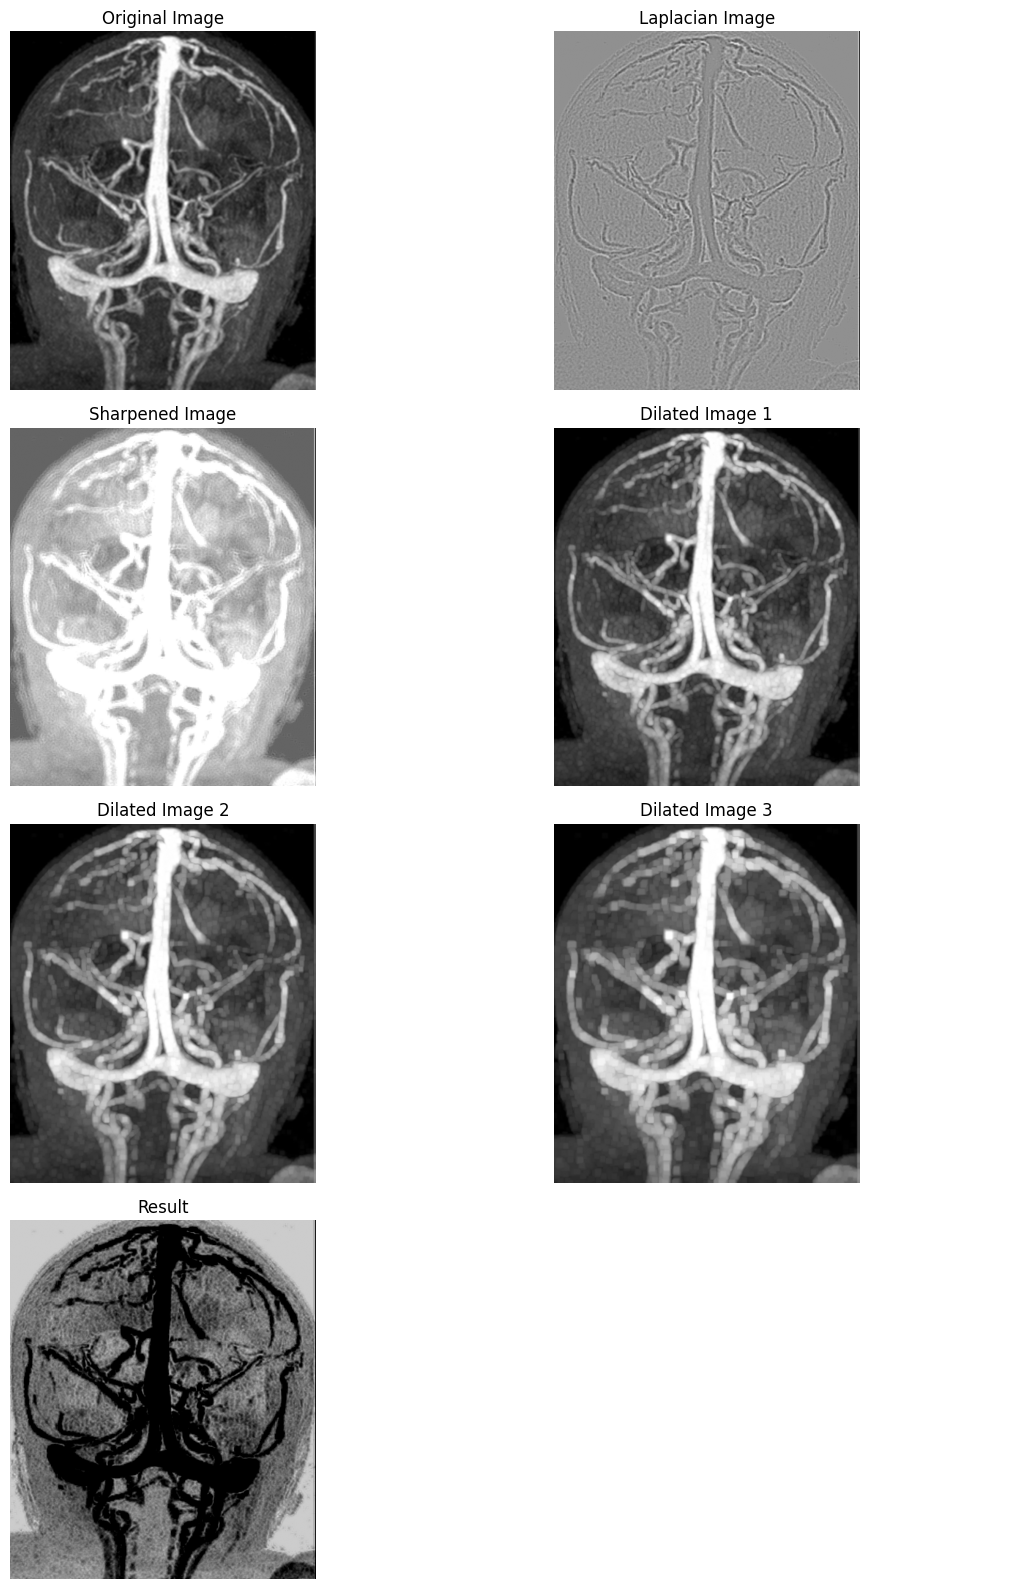

In [49]:
# Apply Gaussian Blur to the thrombosis image
gaussian_image = cv2.GaussianBlur(thrombosis_image, (3, 3), 0.1)

# Apply Laplacian filter to the blurred image to detect edges
laplacian_image = cv2.Laplacian(gaussian_image, cv2.CV_64F, ksize=3)

# Normalize the Laplacian image to the range [0, 255]
laplacian_image = cv2.normalize(laplacian_image, None, 0, 255, cv2.NORM_MINMAX)
laplacian_image = np.uint8(laplacian_image)

# Define a sharpening kernel
sharpening_kernel = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])

# Sharpen the image by adding the Laplacian image to the original image
shapened_image = cv2.add(thrombosis_image, laplacian_image)
sharpened_image = cv2.filter2D(shapened_image, -1, sharpening_kernel)

# Apply Otsu's thresholding to the thrombosis image
ret, thr_image = cv2.threshold(thrombosis_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Initialize a list to store dilated images
dilated_images = []

# Define a kernel for dilation
dilation_kernel = np.ones((3, 3), np.uint8)

# Apply morphological dilation
for i in range(3):
    morphological_dilated_image = cv2.dilate(thrombosis_image, dilation_kernel, iterations=i+1)
    dilated_images.append(morphological_dilated_image)

# Subtract the second dilated image from the Laplacian image
result = cv2.subtract(laplacian_image, dilated_images[1])

# Plot the original, Laplacian, sharpened, dilated images, and the result
plot_images([thrombosis_image, laplacian_image, shapened_image] + dilated_images + [result], 
            labels=['Original Image', 'Laplacian Image', 'Sharpened Image', 'Dilated Image 1', 'Dilated Image 2', 'Dilated Image 3', 'Result'], 
            nrows=4, ncols=2, figsize=(12, 16))


### 3.Application of Opening and Closing Image Processing

Opening and closing are morphological operations that are used to remove noise and small objects (i.e., "salt and pepper" noise) from images while preserving the size and shape of the larger objects in the image.

Opening is an erosion followed by a dilation. Opening can remove small bright spots (i.e., "salt") and connect small dark cracks. This tends to "open" up the gaps between the objects in an image.

Closing is a dilation followed by an erosion. Closing can remove small dark spots (i.e., "pepper") and connect small bright cracks. This tends to "close" up the gaps between the objects in an image.

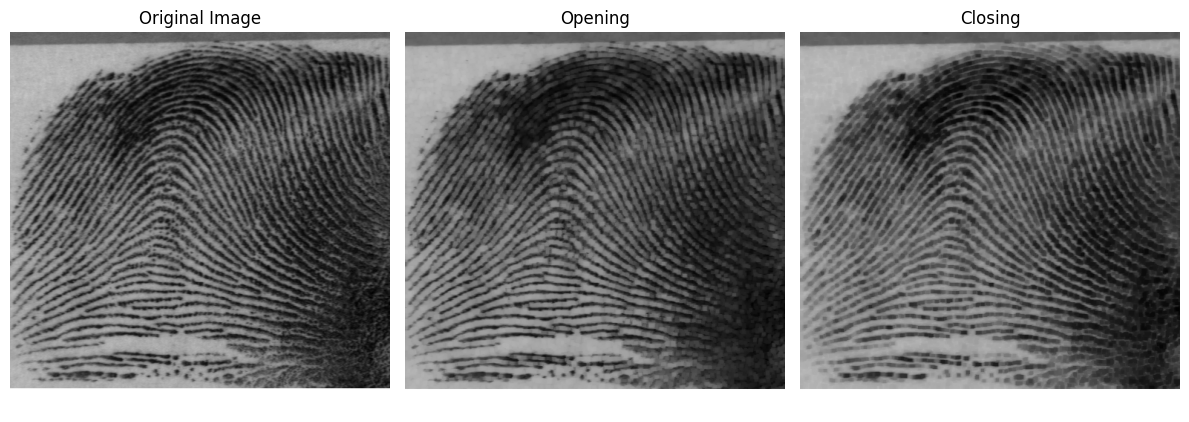

In [50]:
# Opening - Closing
# Defining a kernel for both (opening and closing)
kernel = np.ones((4, 4), np.uint8)

# Applying opening method
opening = cv2.morphologyEx(fingerprint_image, cv2.MORPH_OPEN, kernel)

# Applying closing method
closing = cv2.morphologyEx(fingerprint_image, cv2.MORPH_CLOSE, kernel)

# Showing images
plot_images([fingerprint_image, opening, closing], labels=["Original Image", "Opening", "Closing"], nrows=1, ncols=3)

### Conclusion

### References

* [2] Anon. n.d. “Types of Morphological Operations.” Retrieved (https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html).

* Ravjot Singh. (2020). Morphological transformations of images using OpenCV - Image processing (Part 2). Medium. https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38
